# 1. 추측통계의 기본

## 1.1. 모집단과 표본

### 표본의 추출방법

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [4]:
df = pd.read_csv('../통계적 분석/data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

In [6]:
np.random.choice([1,2,3],3)

array([1, 2, 1])

In [8]:
np.random.choice([1,2,3],3, replace=False)

array([2, 1, 3])

In [9]:
np.random.seed(0)
np.random.choice([1,2,3],3)

array([1, 2, 1])

In [10]:
np.random.seed(0)
sample = np.random.choice(scores,20)

sample.mean()

70.400

In [13]:
scores.mean()

69.530

In [14]:
for i in range(5):
    sample = np.random.choice(scores,20)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균', sample.mean())

1번째 무작위 추출로 얻은 표본평균 72.4
2번째 무작위 추출로 얻은 표본평균 58.2
3번째 무작위 추출로 얻은 표본평균 69.15
4번째 무작위 추출로 얻은 표본평균 74.0
5번째 무작위 추출로 얻은 표본평균 73.65


In [15]:
dice = [1,2,3,4,5,6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [17]:
np.random.choice(dice, p=prob)

2

In [19]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([4, 4, 2, 5, 5, 3, 5, 2, 5, 6, 4, 5, 2, 6, 4, 3, 5, 1, 6, 1, 5, 3,
       6, 6, 3, 5, 5, 5, 3, 6, 4, 6, 5, 4, 6, 4, 6, 5, 6, 5, 6, 5, 6, 5,
       4, 5, 1, 4, 5, 4, 5, 4, 2, 4, 5, 5, 5, 5, 5, 4, 6, 4, 4, 6, 6, 5,
       2, 6, 5, 6, 3, 6, 3, 5, 2, 6, 6, 5, 4, 2, 5, 4, 6, 6, 6, 6, 1, 4,
       6, 3, 5, 2, 3, 1, 6, 3, 4, 6, 5, 1])

In [20]:
freq,_ = np.histogram(sample, bins=6, range=(1,7))
pd.DataFrame({'frequency':freq,
              'relative frequency':freq / num_trial},
              index= pd.Index(np.arange(1,7), name='dice'))

,frequency,relative frequency
dice,,
1,6,0.06
2,8,0.08
3,10,0.10
4,19,0.19
5,30,0.30
6,27,0.27


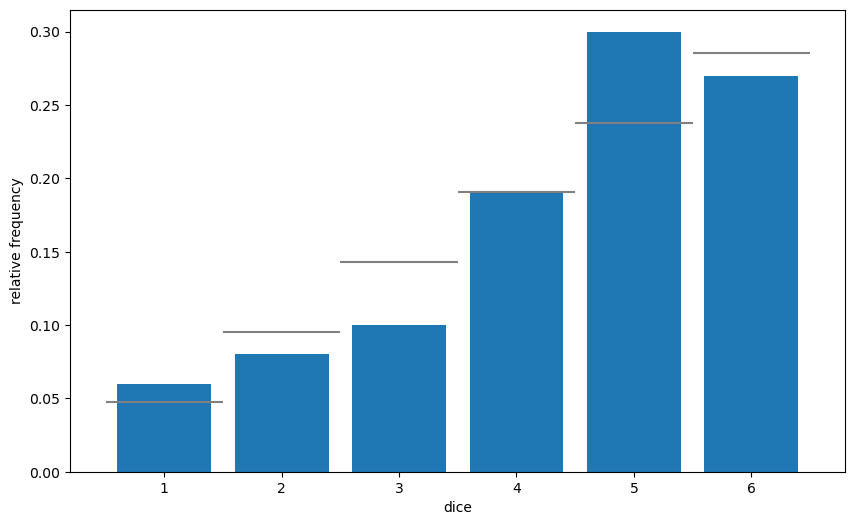

In [38]:
fig = plt.figure(figsize=(10,6))
ax= fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='gray')
# 막대 그래프의 [1.5,2.5, ..., 6.5]에 눈금 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1,2,3,4,5,6]
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

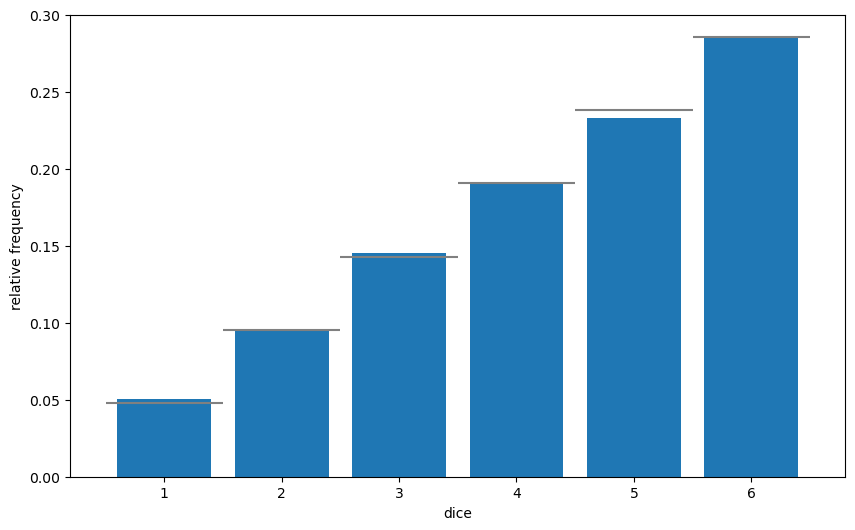

In [39]:
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10,6))
ax= fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

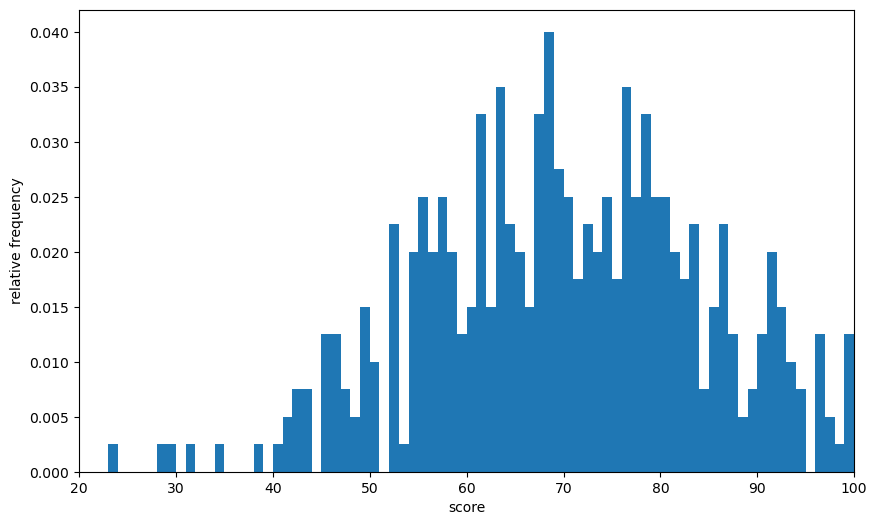

In [40]:
fig= plt.figure(figsize=(10,6))
ax= fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0,100), density=True)
ax.set_xlim(20,100)
ax.set_ylim(0,0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

In [42]:
np.random.choice(scores)

50

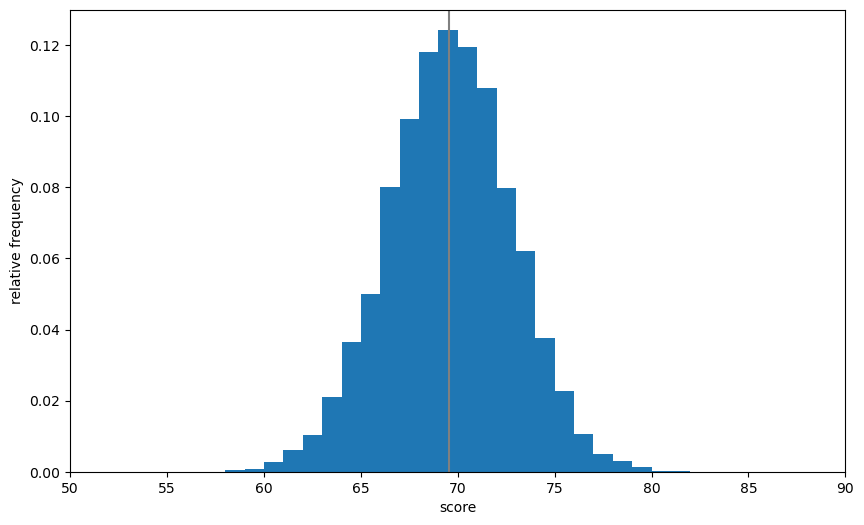

In [44]:
sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]
fig= plt.figure(figsize=(10,6))
ax= fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0,100), density=True)
# 모평균 세로선으로 표시
ax.vlines(np.mean(scores), 0,1,'gray')
ax.set_xlim(50,90)
ax.set_ylim(0,0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()
